# Data Structures

Let's go over some fundamental data structures!

## Arrays

Arrays are containers that hold a fixed number of items of the same type.  They're your basic data structure for storing sequence data.  

![array.png](array.png)

* If $X$ is our array, $X[i]$ is the $i$th element of $X$
* Each element of $X$ should be the same type: e.g. integers, floats, other more complicated structures
* Arrays hold a fixed number of items because they referred to a fixed "chunk" of memory.  If you try an index that is greater than the number of elements you'll get an error. 


<div class="alert alert-warning">
  <strong>Note:</strong> In programming languages where you have to do memory management yourself (e.g. C) you need to be careful about this. If you have an array of length 10 and ask for the 11th element the results can be unpredictable: you might just get whatever was in the next bit of memory adjacent to your array. 

<b>Fortunately you don't really have to worry about this with Python! :) </b>

</div>

image from:
https://www.tutorialspoint.com/data_structures_algorithms/array_data_structure.htm
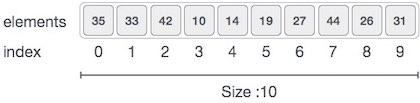

In [148]:
## We can implement our 10 element array as a list in python

X = [35,33,42,10,14,19,27,44,26,31]
print("X[4] = ", X[4])
print("List length = ", len(X))

X[4] =  14
List length =  10


In [149]:
## We can change an element of the array easy enough:

X[9] = 100
print(X)

[35, 33, 42, 10, 14, 19, 27, 44, 26, 100]


In [150]:
## But if we try to add an 11th element this way, we get an error:
X[10] = 101

IndexError: list assignment index out of range

In [151]:
## We need to append: 

X.append(101)
print(X)

[35, 33, 42, 10, 14, 19, 27, 44, 26, 100, 101]


In [152]:
## Or insert: 
X.insert(0, -1)
print(X)

[-1, 35, 33, 42, 10, 14, 19, 27, 44, 26, 100, 101]


## Lists

Lists in python are actually a more general type of data structure: the elements don't all have to be the same type.


In [153]:
## e.g.
a_weird_list = ["A", 1, ["B", 1], (1,3,4)]
print(a_weird_list)
print(type(a_weird_list))

['A', 1, ['B', 1], (1, 3, 4)]
<class 'list'>


In [154]:
## In this list every element is a different type
for i, x in enumerate(a_weird_list):
    print(i, x, type(x))


0 A <class 'str'>
1 1 <class 'int'>
2 ['B', 1] <class 'list'>
3 (1, 3, 4) <class 'tuple'>


## Linked Lists

Arrays are good for a lot of things, particular accessing specific elements directly.  But they're not optimal for all tasks.  Another way to create a list is to link together a bunch of elements.
You basically have a node (i.e. the element value) and a pointer to (i.e. address of) the next element:

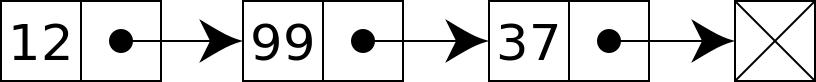

The next element could be anywhere in memory!  This is helpful when you are constructing bits of a data structure in different subtasks and need to collect them to form a larger one.  This is also very helpful when you don't know how long your list could be in advance because you don't have to keep allocating continguous chunks of memory. 

Some blogs with example implementations of linked lists in python: 

https://medium.com/@kojinoshiba/data-structures-in-python-series-1-linked-lists-d9f848537b4d
https://www.tutorialspoint.com/python_data_structure/python_linked_lists.htm
https://stackabuse.com/linked-lists-in-detail-with-python-examples-single-linked-lists/
https://www.freecodecamp.org/news/python-interview-question-guide-how-to-code-a-linked-list-fd77cbbd367d/

In [155]:
class linkedListNode(object):    
    def __init__(self, value, nextNode=None):        
        self.value = value        
        self.nextNode = nextNode
        
node1 = linkedListNode("a")
node2 = linkedListNode("b")
node3 = linkedListNode("c")



In [156]:
## Currently we have nodes with values but no links
for node in [node1, node2, node3]: 
    print(node)
    print(node.nextNode)

None
None
None


In [157]:
## So we set the links:
node1.nextNode = node2
node2.nextNode = node3
for i, node in enumerate([node1, node2, node3]): 
    print(i, ":node:", node)
    print(i, ":next:", node.nextNode)

0 :node: <__main__.linkedListNode object at 0x7f616062b3c8>
0 :next: <__main__.linkedListNode object at 0x7f616062b358>
1 :node: <__main__.linkedListNode object at 0x7f616062b358>
1 :next: <__main__.linkedListNode object at 0x7f616062b400>
2 :node: <__main__.linkedListNode object at 0x7f616062b400>
2 :next: None


In [158]:
## Traverse the list and print out values
def print_linked_list(start_node):
    current_node = start_node
    i = 0
    while current_node is not None:
        print(i, " value:", current_node.value)
        ## Go to the next node
        current_node = current_node.nextNode
        i+=1

#you can also think about how to do this recursively

In [159]:
start_node = node1
print_linked_list(start_node)

0  value: a
1  value: b
2  value: c


In [160]:
## It's easy to rearrange the order in a linked list: you just have to change the pointers
## Q: How would you do this with an array?

node1.nextNode = node3
node3.nextNode = node2
node2.nextNode = None ## What happens if we don't add this?

print_linked_list(start_node)

0  value: a
1  value: c
2  value: b


### Basic Operations

* Insert an element
* Delete an element
* Traverse the list (i.e. go through every element, as in print_linked_list)
* Count the number of elements 
* Search for an item 

In [161]:
## Insert a node after the first list element

node4  = linkedListNode("x")
node4.nextNode = start_node.nextNode
start_node.nextNode = node4

print_linked_list(start_node)

# Q: how would you insert it after the 3rd element? the nth? 

0  value: a
1  value: x
2  value: c
3  value: b


In [162]:
## Delete nodes with value "c":

def deleteNodeWithVal(start_node, value):

    currnode = start_node
    prevnode = None
    while currnode is not None:
        ## If there's a match we want to unlink the node from the chain     
        if currnode.value == value:
            ## In this case the value matches so we want to delete this node
            ## We do this by changing the pointer of the previous
            ## If there''s no previous node, that means we have to change the start node of the list
            if prevnode is None:
                start_node = currnode.nextNode
            else:
                # link the previous node to the next one (skipping the current node)
                prevnode.nextNode = currnode.nextNode
        else:
            prevnode = currnode
        
        #Go to the next link in the chain
        currnode = currnode.nextNode
    return start_node
    
    

print(start_node)
print_linked_list(start_node)


0  value: a
1  value: x
2  value: c
3  value: b


In [163]:
new_start = deleteNodeWithVal(start_node, "c")
print_linked_list(new_start)

0  value: a
1  value: x
2  value: b


In [164]:
print(node3)
print(node3.value)
print(node3.nextNode)
print(node3.nextNode.value)


c
b


In [165]:
## The deleted node is actually still hanging about
## We still need to delete it
#del node3
#print(node3)
## This should be added to our function above

In [166]:
## We should encapsulate this all in a linked list class

class LinkedList(object):
    def __init__(self):        
        self.startNode = None       
        self.endNode = None
    
    def append(self, val):
        newnode = linkedListNode(val)
        ## If there's nothing in the list, the new node is the start node and end node
        if self.endNode == None:
            self.startNode = newnode
            self.endNode = newnode
        else:
        ## Otherwise just point to the new node from the existing end node
            self.endNode.nextNode = newnode
            self.endNode = newnode
        
    def print(self):
        print_linked_list(self.startNode)

    def deleteVal(self, val):
        self.startNode = deleteNodeWithVal(self.startNode, val)
        
    ### Add other operations like __repr__, insertion, search...

In [167]:
mylist = LinkedList()

In [168]:
mylist.append("X")
mylist.print()

0  value: X


In [169]:
[mylist.append(val) for val in ["a", "long", "long", "time", "ago"]]
mylist.print()

0  value: X
1  value: a
2  value: long
3  value: long
4  value: time
5  value: ago


In [170]:
mylist.deleteVal("X")
mylist.print()

0  value: a
1  value: long
2  value: long
3  value: time
4  value: ago


## Trees


We can build tree structures in a similar way to linked lists

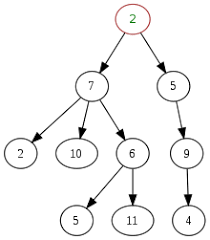

Roughly: 

* A tree "starts" with a root node.  
* Each node can then have multiple children. 
    * i.e. a node can have multiple pointers to other nodes (it's children)
* Each node can only have one parent (one link to a "higher" node).
* Nodes with no children are called terminal nodes or leaves, other nodes are call non-terminal nodes.

You can think of a linked list as a "stick": every non-terminal node only has one child.

In general, each node can have many children.  In practice, we usually deal with binary trees (at most 2 children per node). 

In [171]:
class BinaryTreeNode(object):    
    def __init__(self, value, leftNode=None, rightNode=None):        
        self.value = value        
        self.leftNode = leftNode
        self.rightNode = rightNode
        ## You could add in other identifiers, attributes etc
        
    def __repr__(self):
        ## Define the default way to print a node
        return "TreeNode(%s, %s, %s)" % (self.value, self.leftNode, self.rightNode)
       
        


### Binary Search Tree
A binary search tree has the property that: 
* all values in the left subtree as less than the root nodes value (aka key)
* all values in the right subtree as greater than the root nodes value
* left and right subtrees are also binary search trees

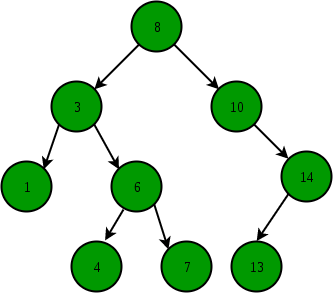

https://www.geeksforgeeks.org/binary-search-tree-data-structure/

In [172]:
rootNode = BinaryTreeNode(value=8)
print(rootNode)
print(rootNode.value)

TreeNode(8, None, None)
8


In [173]:
def BSTInsert(rootnode, newnode): 
    if rootnode == None:
        print("root === None")
        rootnode = currnode
    else: 
        if newnode.value <= rootnode.value: 
            print("new value <= root value: %d %d" % (newnode.value, rootnode.value))
            if rootnode.leftNode == None:
                print("new left node")
                rootnode.leftNode = newnode
            else:
                BSTInsert(rootnode.leftNode, newnode)
        else: 
            print("new value > root value: %d %d" % (newnode.value, rootnode.value))

            if rootnode.rightNode == None:
                print("new rght node")
                rootnode.rightNode = newnode
            else:
                BSTInsert(rootnode.rightNode, newnode)
    return
            

In [174]:
curr = BinaryTreeNode(value=7)

In [175]:
BSTInsert(rootNode, curr)


new value <= root value: 7 8
new left node


In [176]:
print("** From root")
print(rootNode)
print(rootNode.value)
print("** Left")
print(rootNode.leftNode)
print(rootNode.leftNode.value)
print("** right")
print(rootNode.rightNode)
print(rootNode.rightNode.value)


** From root
TreeNode(8, TreeNode(7, None, None), None)
8
** Left
TreeNode(7, None, None)
7
** right
None


AttributeError: 'NoneType' object has no attribute 'value'

## Navigating the tree
We need a way to traverse the tree, i.e. go through all the elements of the list.  One way is depth-first:

In [177]:
def DepthFirstTraverse(rootnode):
    if rootnode == None:
        return
    
    print(rootnode.value)
    DepthFirstTraverse(rootnode.leftNode)
    DepthFirstTraverse(rootnode.rightNode)
    return

In [178]:
rootNode = BinaryTreeNode(value=8)
print(rootNode)
print(rootNode.value)

BSTInsert(rootNode, BinaryTreeNode(value=7))
BSTInsert(rootNode, BinaryTreeNode(value=9))
BSTInsert(rootNode, BinaryTreeNode(value=2))
BSTInsert(rootNode, BinaryTreeNode(value=1))
BSTInsert(rootNode, BinaryTreeNode(value=100))


TreeNode(8, None, None)
8
new value <= root value: 7 8
new left node
new value > root value: 9 8
new rght node
new value <= root value: 2 8
new value <= root value: 2 7
new left node
new value <= root value: 1 8
new value <= root value: 1 7
new value <= root value: 1 2
new left node
new value > root value: 100 8
new value > root value: 100 9
new rght node


In [180]:
print(rootNode)


TreeNode(8, TreeNode(7, TreeNode(2, TreeNode(1, None, None), None), None), TreeNode(9, None, TreeNode(100, None, None)))


In [207]:
print(rootNode.leftNode)    

TreeNode(7, TreeNode(2, TreeNode(1, None, None), None), None)


In [208]:
print(rootNode.rightNode)

TreeNode(9, None, TreeNode(100, None, None))


In [101]:
DepthFirstTraverse(rootNode)

8
7
2
1
9
100


In [102]:
## Binary Search Trees are for doing binary search!
## Compare this sort of search to an ordered list...

def BinarySearch(rootnode, query):
    
    if rootnode == None:
        ## We've gotten to the leaves and didn't find the value
        return None
    
    elif rootnode.value == query:
        ## We've got a match! Return a pointer to that node
        return rootnode
    
    elif query < rootnode.value:
        ## Look left
        return BinarySearch(rootnode.leftNode, query)
    
    else:
        ## Look right
        return BinarySearch(rootnode.rightNode, query)
    

In [103]:
BinarySearch(rootNode, 9)

TreeNode(9, None, TreeNode(100, None, None))

## Stacks

A fundamental data structure is the stack.  The stack data structure is like a stack in real life: 

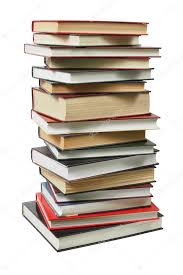

You can only really easily deal with the very top of the stack: you can look at the top, put something on top, or take the top thing off.







### Basic Operations
* push: put an element on thetop of the stack 
* pop: take an element off the top of the stack
* peek: look at the top element
* You may also be able to look at all the values in the stack (e.g. shift reduce parsing)

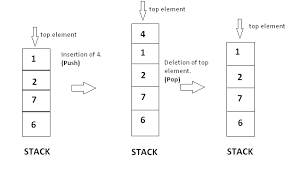
The thing to remember about stacks is: Last in First Out (LIFO).
Compare this to a Queue: First in First Out (FIFO)

In [104]:
## python list append is like a push operation:
s = []
s.append("a")
s.append("long")
s.append("time")
s.append("ago")
print(s)

['a', 'long', 'time', 'ago']


In [105]:
poptop = s.pop()
print(poptop)
print(s)

ago
['a', 'long', 'time']


Remember python lists are really arrays, so if your stack grows a lot (i.e. a lot of push operations) you'll need to do a lot of memory reallocation.  You can also implement stacks in python using double ended queues (deque) which are actually doubly linked lists: 



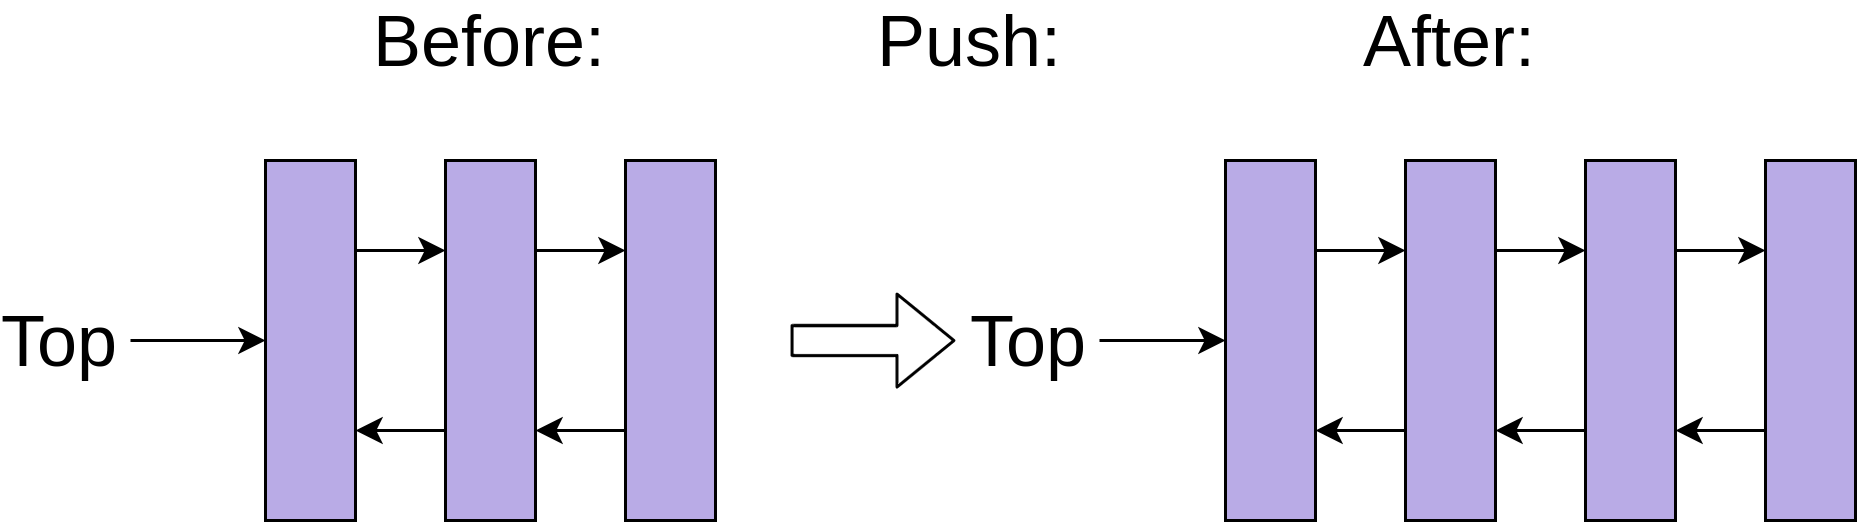

https://realpython.com/how-to-implement-python-stack/
https://runestone.academy/runestone/books/published/pythonds/BasicDS/ImplementingaStackinPython.html

## Parse Trees and Stacks

Stacks are very simple, but they give you a form of <em>memory</em>.  They are basically how a computer evaluates functions that call other functions.  You put the new function call on the top of the stack and pop it off when it's done.  So, you "remember" what function called it, because it's still on the stack.

They appear a lot from a foundations of language processing perspective, because we can use them to parse expressions and to generate trees.

Stacks are part of what define Context Free Languages. Basically, with finite state automata, we can do regular expressions (limited recursion).  If we add stacks (to form pushdown automata) we can do more!


### Counting with stacks (sort of)
Stacks allow us to do a limited form of counting.  An example of this is being able to determine whether an expression has properly matching parenthese.

In [106]:
currstr = "(S(NP(Det N) VP(v PP)))"
print(currstr)

(S(NP(Det N) VP(v PP)))


In [107]:
def matchParens(xstr):
    stack = []
    for i in xstr:
        ## Just for inspection
        print(stack, "||", i)
   
        ## If you see an open paren, add it to the stack
        if i == "(":
            stack.append(i)
            
        ## If you see a close paren, the one it matches with should be at the top of the stack
        elif (i == ")"):
            if stack[-1] == "(":
                stack.pop()
            else: 
                return "mismatch"
        else:
            pass
            
    ## If you've matched all your parens, you'll get an empty stack at the end!          
    if stack == []:
        return "all matched"
    return  "mismatch"
    

In [108]:
matchParens(currstr)

[] || (
['('] || S
['('] || (
['(', '('] || N
['(', '('] || P
['(', '('] || (
['(', '(', '('] || D
['(', '(', '('] || e
['(', '(', '('] || t
['(', '(', '('] ||  
['(', '(', '('] || N
['(', '(', '('] || )
['(', '('] ||  
['(', '('] || V
['(', '('] || P
['(', '('] || (
['(', '(', '('] || v
['(', '(', '('] ||  
['(', '(', '('] || P
['(', '(', '('] || P
['(', '(', '('] || )
['(', '('] || )
['('] || )


'all matched'

In [109]:
currstr = "(S((NP(Det N))( VP(v PP)))"
print(currstr)

(S((NP(Det N))( VP(v PP)))


In [110]:
matchParens(currstr)

[] || (
['('] || S
['('] || (
['(', '('] || (
['(', '(', '('] || N
['(', '(', '('] || P
['(', '(', '('] || (
['(', '(', '(', '('] || D
['(', '(', '(', '('] || e
['(', '(', '(', '('] || t
['(', '(', '(', '('] ||  
['(', '(', '(', '('] || N
['(', '(', '(', '('] || )
['(', '(', '('] || )
['(', '('] || (
['(', '(', '('] ||  
['(', '(', '('] || V
['(', '(', '('] || P
['(', '(', '('] || (
['(', '(', '(', '('] || v
['(', '(', '(', '('] ||  
['(', '(', '(', '('] || P
['(', '(', '(', '('] || P
['(', '(', '(', '('] || )
['(', '(', '('] || )
['(', '('] || )


'mismatch'

### Generating from Context Free Grammars with a Stack

Given a bunch of context free rules, we can generate the strings in the language defined by those rules:

\begin{align}
S & \rightarrow NP \,\, VP \\
NP & \rightarrow DT \,\, N \\
VP & \rightarrow V \,\, NP \\
V &\rightarrow \{loved, hated, tricked\}\\
N &\rightarrow \{cat, dog\}\\
DT &\rightarrow \{a, the\}\\
\end{align}




In [111]:
ruledict = {'S':("rule",['NP','VP']), 
            'NP':("rule",['DT','N']),
            'VP':("rule",['V', 'NP']), 
            'V':("term", ['loved','hated','tricked']),
            'N':("term",['cat','dog']),
            'DT':("term",['a','the'])
    
}

In [112]:
import random 

def genSentence(ruledict, startSymbol="S"):
    sentence = []
    stack = []
    stack.append(startSymbol)
    
    while stack != []:
        print("STACK:", stack)
        curr_symb = stack.pop()
        curr_rule = ruledict[curr_symb]
        if curr_rule[0] == "rule":
            for r in reversed(curr_rule[1]):
                stack.append(r)
        else:
            sentence.append(random.choice(curr_rule[1]))
            print("generated so far:", sentence)
            
    return(sentence)
    

In [113]:
genSentence(ruledict)

STACK: ['S']
STACK: ['VP', 'NP']
STACK: ['VP', 'N', 'DT']
generated so far: ['a']
STACK: ['VP', 'N']
generated so far: ['a', 'cat']
STACK: ['VP']
STACK: ['NP', 'V']
generated so far: ['a', 'cat', 'hated']
STACK: ['NP']
STACK: ['N', 'DT']
generated so far: ['a', 'cat', 'hated', 'the']
STACK: ['N']
generated so far: ['a', 'cat', 'hated', 'the', 'dog']


['a', 'cat', 'hated', 'the', 'dog']

In [209]:
class TreeNode(object):    
    def __init__(self, value, children=[]):        
        self.value = value        
        ## No restriction on the number of children
        ## Here we have a list of child nodes rather than specific pointers to left or right
        self.children = children
        
    def __repr__(self):
        return "TreeNode(%s, %s)" % (self.value, self.children)

In [210]:
import random 

def genSentenceTree(ruledict, startSymbol="S"):
    sentence = []
    stack = []

    treeroot = TreeNode(startSymbol, children=[])
    print(treeroot)
    stack.append(treeroot)

    while stack != []:
        print("---------------")
        print("STACK:", stack)
        currnode  = stack.pop()
        print("POP:", currnode)
        
        curr_rule = ruledict[currnode.value]
        print("Current rule:", curr_rule)
        if curr_rule[0] == "rule":
            for r in reversed(curr_rule[1]):
                print("PUSH:", r)
                newnode = TreeNode(r, children=[])
                stack.append(newnode)
                currnode.children.insert(0, newnode)
        else:
            newword = random.choice(curr_rule[1])
            newnode = TreeNode(newword, children=[])
            currnode.children.insert(0,newnode)
            sentence.append(newword)
            print("* generated so far:", sentence)
      
            
    return(sentence, treeroot)
    

In [135]:
sentence, tree = genSentenceTree(ruledict)

TreeNode(S, [])
---------------
STACK: [TreeNode(S, [])]
POP: TreeNode(S, [])
Current rule: ('rule', ['NP', 'VP'])
PUSH: VP
PUSH: NP
---------------
STACK: [TreeNode(VP, []), TreeNode(NP, [])]
POP: TreeNode(NP, [])
Current rule: ('rule', ['DT', 'N'])
PUSH: N
PUSH: DT
---------------
STACK: [TreeNode(VP, []), TreeNode(N, []), TreeNode(DT, [])]
POP: TreeNode(DT, [])
Current rule: ('term', ['a', 'the'])
* generated so far: ['a']
---------------
STACK: [TreeNode(VP, []), TreeNode(N, [])]
POP: TreeNode(N, [])
Current rule: ('term', ['cat', 'dog'])
* generated so far: ['a', 'cat']
---------------
STACK: [TreeNode(VP, [])]
POP: TreeNode(VP, [])
Current rule: ('rule', ['V', 'NP'])
PUSH: NP
PUSH: V
---------------
STACK: [TreeNode(NP, []), TreeNode(V, [])]
POP: TreeNode(V, [])
Current rule: ('term', ['loved', 'hated', 'tricked'])
* generated so far: ['a', 'cat', 'hated']
---------------
STACK: [TreeNode(NP, [])]
POP: TreeNode(NP, [])
Current rule: ('rule', ['DT', 'N'])
PUSH: N
PUSH: DT
--------

In [136]:
sentence

['a', 'cat', 'hated', 'a', 'cat']

In [137]:
tree

TreeNode(S, [TreeNode(NP, [TreeNode(DT, [TreeNode(a, [])]), TreeNode(N, [TreeNode(cat, [])])]), TreeNode(VP, [TreeNode(V, [TreeNode(hated, [])]), TreeNode(NP, [TreeNode(DT, [TreeNode(a, [])]), TreeNode(N, [TreeNode(cat, [])])])])])

In [146]:
## Write a function to print this out in a nicer fashion?

def print_tree(node, depth=1):
    print("\t"*(depth-1), "----", node.value)
    for childnode in node.children:
        print_tree(childnode, depth=depth+1)
    

In [147]:
## An ok, but not that great representation of the tree
## You can probably find a better pretty print function for trees out there 
## Or practice write one yourself!
print_tree(tree)

 ---- S
	 ---- NP
		 ---- DT
			 ---- a
		 ---- N
			 ---- cat
	 ---- VP
		 ---- V
			 ---- hated
		 ---- NP
			 ---- DT
				 ---- a
			 ---- N
				 ---- cat
